# Stock research with alpha_vantage 

1) Extracting latest stock price data

2) Applying few trendy technical indicators:

2.1) Bollinger Band (BB)

2.2) Commodity Channel Index (CCI)

2.3) AROON

2.4) Average Directional Movement Index (ADX)

In [1]:
# Import packages required
# Import TimeSeries to return output in form of time series
from alpha_vantage.timeseries import TimeSeries
# Import TechIndicators to allow output return from technical indicators
from alpha_vantage.techindicators import TechIndicators
# Import for plotting purposes
import matplotlib.pyplot as plt

In [2]:
# Execute time series and tech indicator function of alpha_vantage with API key
with open('ak.txt', 'r') as myFile:
    keys=myFile.read()
    
    ts=TimeSeries(key=keys, output_format='pandas')
    TI=TechIndicators(key=keys, output_format='pandas')

<Figure size 432x288 with 0 Axes>

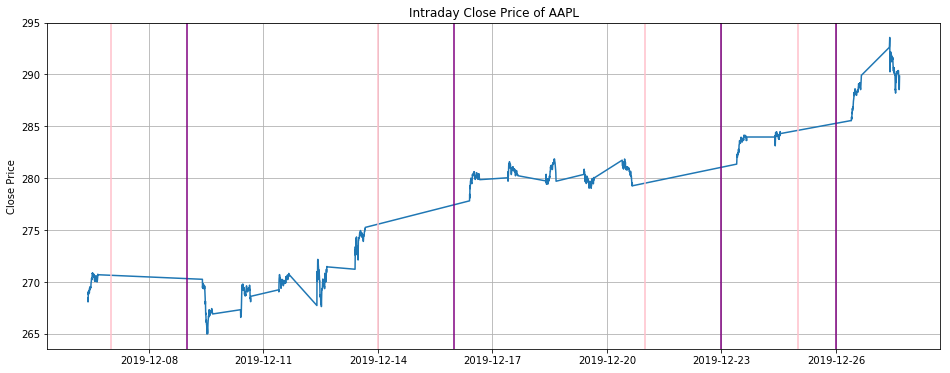

<Figure size 432x288 with 0 Axes>

In [3]:
# Plot of Close price of stock with market close period indicator
# Using AAPL stock as example
# Extracting time series data of AAPL by 5 min interval
data0, meta_data0=ts.get_intraday(symbol='AAPL', interval='5min', outputsize='full')

plt.clf()
plt.figure(figsize=(16,6))
plt.plot(data0['4. close'])
plt.title('Intraday Close Price of AAPL')

# Lines to define market close period, explaination below:
def market_close_plot():
    plt.axvline(x='2019-12-7', color='pink')
    plt.axvline(x='2019-12-9', color='purple')

    plt.axvline(x='2019-12-14', color='pink')
    plt.axvline(x='2019-12-16', color='purple')

    plt.axvline(x='2019-12-21', color='pink')
    plt.axvline(x='2019-12-23', color='purple')

    plt.axvline(x='2019-12-25', color='pink')
    plt.axvline(x='2019-12-26', color='purple')

market_close_plot()
plt.ylabel('Close Price')
plt.grid(True)
plt.show()
plt.tight_layout()

# Interesting fact:
# It is observed that for period within two lines,
# (pink,starting period ; purple, ending period ; all are 2 day period exc. last period)
# stock price rises smoothly, implying that it is a weekend and market is closed.

# Last period(25th Dec) is basically Christmas so market closed on public holiday!

In [4]:
# Provides info on data retrieved
meta_data0

{'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2019-12-27 16:00:00',
 '4. Interval': '5min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [5]:
# Display last few data points
data0.tail()

,1. open,2. high,3. low,5. volume,4. close
date,,,,,
2019-12-27 15:40:00,289.2478,289.29,289.06,291042.0,289.1500
2019-12-27 15:45:00,289.1699,289.23,288.52,366227.0,288.5342
2019-12-27 15:50:00,288.5400,288.97,288.54,529267.0,288.6200
2019-12-27 15:55:00,288.6300,289.31,288.50,634395.0,289.2897
2019-12-27 16:00:00,289.3000,289.99,289.18,1076602.0,289.8300


## 2)

In [6]:
# Applying 4 trendy technical indicator to stock prices
# 1.Bolllinger Band, 2.Commodity Channel Index, 3.AROON, 4.Average Directional Movement Index
data_bb, meta_data_bb=TI.get_bbands(symbol='AAPL', interval='5min', time_period=60)
data_cci, meta_data_cci=TI.get_cci(symbol='AAPL', interval='5min', time_period=60)
data_aroon, meta_data3_aroon=TI.get_aroon(symbol='AAPL', interval='5min', time_period=60)
data_adx, meta_data_adx=TI.get_adx(symbol='AAPL', interval='5min')

legend_bb=['Mid_Band', 'Lower_Band', 'Upper_Band', 'Close']
legend_cci=['CCI']
legend_aroon=['Aroon_Up', 'Aroon_Down']
legend_adx=['ADX']

### 2.1) Bollinger Bands (BB)

<Figure size 432x288 with 0 Axes>

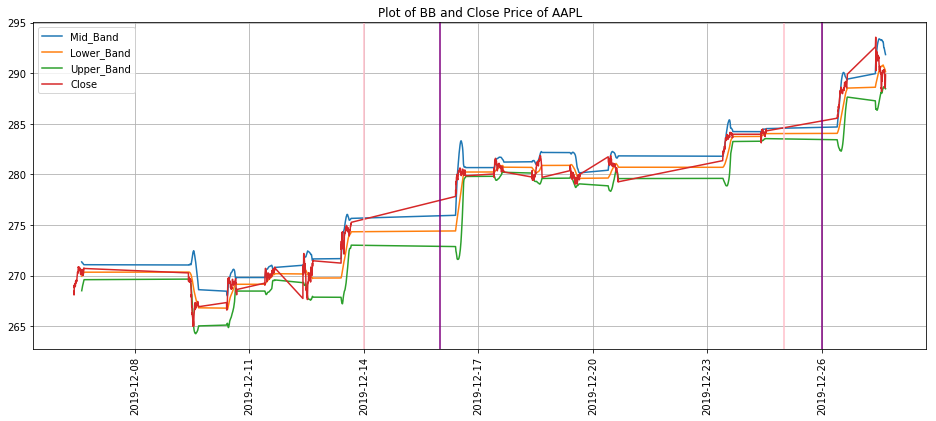

In [7]:
# BB
# Price rise above upper BB, relatively high price(suggest price might drop soon, short stock)
# Price rise above lower BB, relatively low price(suggest price might rise soon, long stock)
plt.clf()
plt.figure(figsize=(16,6))

plt.plot(data_bb)
plt.plot(data0['4. close'])
plt.xticks(rotation=90)

# Note: From pink to purple line, MAJOR LOSS PERIOD
def major_loss_bb():
    # Losses this period, price(red) crosses above upper BB(green), 
    # indicates relatively high price so suggesting short stock but price still continues to rise afterwards.

    # Losses for following 2 period as price(red) rises even after crossing above upper BB(green), 
    # perhaps suggesting that BB might not be an effecient indicator during market close period
    plt.axvline(x='2019-12-14', color='pink')
    plt.axvline(x='2019-12-16', color='purple')

    plt.axvline(x='2019-12-25', color='pink')
    plt.axvline(x='2019-12-26', color='purple')    

major_loss_bb()
plt.title('Plot of BB and Close Price of AAPL')
plt.legend(legend_bb, loc=0)
plt.grid()
plt.show()

### 2.2) Commodity Channel Index (CCI)

<Figure size 432x288 with 0 Axes>

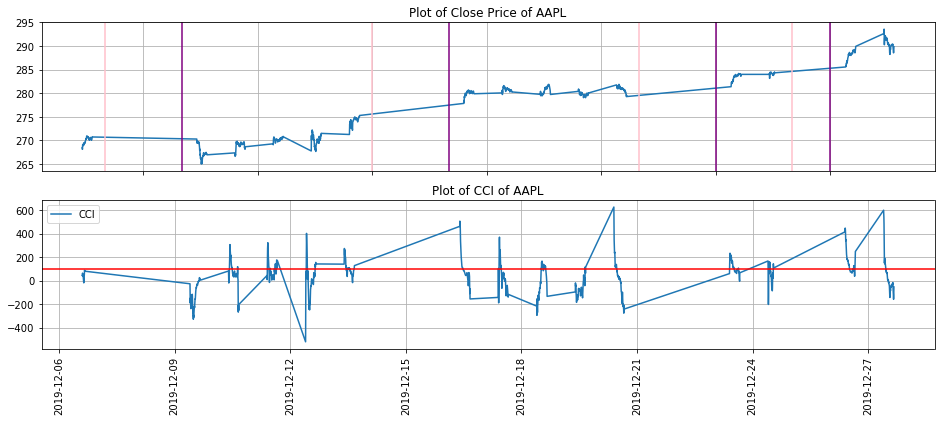

In [8]:
# CCI
# Higher (+) CCI value, stronger the price rise trend ; 
# Lowher (+) CCI value, stronger the price drop trend ; 
# Note: From pink to purple line, MARKET CLOSE PERIOD       
plt.clf()
plt.figure(figsize=(16,6))
plt.subplot(2,1,1).set_xticklabels([])
plt.plot(data0['4. close'])
plt.title('Plot of Close Price of AAPL')
market_close_plot()
plt.grid()

plt.subplot(2,1,2)
plt.plot(data_cci)
plt.xticks(rotation=90)
plt.axhline(y=100, color='r')
plt.title('Plot of CCI of AAPL')
plt.legend(legend_cci, loc=0)
plt.grid()
plt.show()
# CCI does seen to match well with the close price of AAPL, even during market close period following big trends with
# high CCI value and short trend(reversals) with small CCI value or immediate spike and fall of CCI value.

### 2.3) AROON

<Figure size 432x288 with 0 Axes>

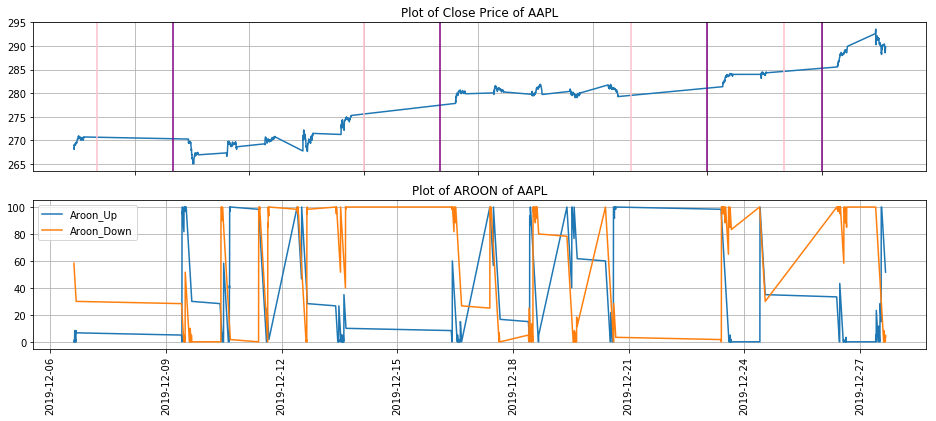

In [9]:
# AROON
# Aroon_Up value stays above 70 and Arron_Down below 30, strong upward trend indication
# Aroon_Down value stays above 70 and Arron_Up below 30, strong downward trend indication
# Aroon_Down crosses above Aroon_Up and rise, weakening of upward trend(reversal) indication

# Note: From pink to purple line, MARKET CLOSE PERIOD
plt.clf()
plt.figure(figsize=(16,6))
plt.subplot(2,1,1).set_xticklabels([])
plt.plot(data0['4. close'])
plt.title('Plot of Close Price of AAPL')
market_close_plot()
plt.grid()

plt.subplot(2,1,2)
plt.plot(data_aroon)
plt.xticks(rotation=90)
plt.title('Plot of AROON of AAPL')
plt.legend(legend_aroon, loc=0)
plt.grid()
plt.show()
# Aroon up/down seemed to fluctuate a lot with little change in close price of AAPL(except during market close period),
# perhaps suitable for very short immediate decision trading strategy(intraday or even by the minute)

### 2.4) Average Directional Movement Index (ADX)

<Figure size 432x288 with 0 Axes>

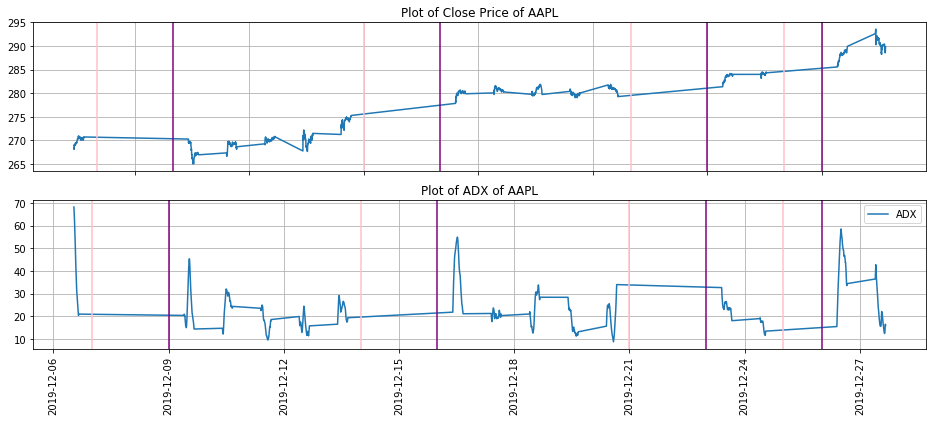

In [10]:
# Average Directional Movement Index (ADX)
# ADX high value represents strong trend; 
# ADX low value represents weak trend; 
# Note: From pink to purple line, MARKET CLOSE PERIOD       
plt.clf()
plt.figure(figsize=(16,6))
plt.subplot(2,1,1).set_xticklabels([])
plt.plot(data0['4. close'])
plt.title('Plot of Close Price of AAPL')
market_close_plot()
plt.grid()

plt.subplot(2,1,2)
plt.plot(data_adx)
plt.xticks(rotation=90)
market_close_plot()
plt.title('Plot of ADX of AAPL')
plt.legend(legend_adx, loc=0)
plt.grid()
plt.show()
# ADX value seem to match closing price of AAPL as 
# ADX value spikes and falls immediately for price (spike/fall) in small time interval
# and value remains low and flat during market close period